<a href="https://colab.research.google.com/github/tandat-1305/Gradient_Descent/blob/main/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [6]:
def mean_squared_error(y_true, y_predicted):    
    #Tính hàm loss và coss 
    cost = np.sum((y_true-y_predicted)**2) / len(y_true)
    return cost

In [21]:
# Hàm Gradient Descent
# Tạo iterations, learning_rate, stopping_threshold
# Các siêu tham số có thể được điều chỉnh
def gradient_descent(x, y, iterations = 1000, learning_rate = 0.0001, 
                     stopping_threshold = 1e-6):
      
    # Khởi tạo weight, bias, learning rate and iterations
    current_weight = 0.1 #trọng số
    current_bias = 0.01 #độ lệch
    iterations = iterations #số lần lặp
    learning_rate = learning_rate
    n = float(len(x))
      
    costs = []
    weights = []
    previous_cost = None
      
    #Ước tính các tham số tối ưu
    for i in range(iterations):
          
        # Đưa ra dự án
        y_predicted = (current_weight * x) + current_bias
          
        # Tính toán cost hiện tại
        current_cost = mean_squared_error(y, y_predicted)
  
        # Nếu cost thay đổi nhỏ hơn hoặc bằng stoping_threshood thì sẽ dừng giảm tốc độ
        if previous_cost and abs(previous_cost-current_cost)<=stopping_threshold:
            break
        #chuyển cost hiện tại thành cost trước  
        previous_cost = current_cost 
  
        costs.append(current_cost)
        weights.append(current_weight)
          
        # Tính gradients  
        weight_derivative = -(2/n) * sum(x * (y-y_predicted))
        bias_derivative = -(2/n) * sum(y-y_predicted)
          
        # Cập nhật weights and bias
        current_weight = current_weight - (learning_rate * weight_derivative)
        current_bias = current_bias - (learning_rate * bias_derivative)
                  
        #In ra mỗi kết quả sau mỗi lần lặp thứ 1000 
        print(f"Iteration {i+1}: Cost {current_cost}, Weight \
        {current_weight}, Bias {current_bias}")
    # Biểu diễn weights and cost sau mỗi lần lặp
    plt.figure(figsize = (8,6))
    plt.plot(weights, costs)
    plt.scatter(weights, costs, marker='o', color='red')
    plt.title("Cost vs Weights")
    plt.ylabel("Cost")
    plt.xlabel("Weight")
    plt.show()
      
    return current_weight, current_bias

Iteration 1: Cost 4352.088931274409, Weight         0.7593291142562117, Bias 0.02288558130709
Iteration 2: Cost 1114.8561474350017, Weight         1.081602958862324, Bias 0.02918014748569513
Iteration 3: Cost 341.42912086804455, Weight         1.2391274084945083, Bias 0.03225308846928192
Iteration 4: Cost 156.64495290904443, Weight         1.3161239281746984, Bias 0.03375132986012604
Iteration 5: Cost 112.49704004742098, Weight         1.3537591652024805, Bias 0.034479873154934775
Iteration 6: Cost 101.9493925395456, Weight         1.3721549833978113, Bias 0.034832195392868505
Iteration 7: Cost 99.4293893333546, Weight         1.3811467575154601, Bias 0.03500062439068245
Iteration 8: Cost 98.82731958262897, Weight         1.3855419247507244, Bias 0.03507916814736111
Iteration 9: Cost 98.68347500997261, Weight         1.3876903144657764, Bias 0.035113776874486774
Iteration 10: Cost 98.64910780902792, Weight         1.3887405007983562, Bias 0.035126910596389935
Iteration 11: Cost 98.6408

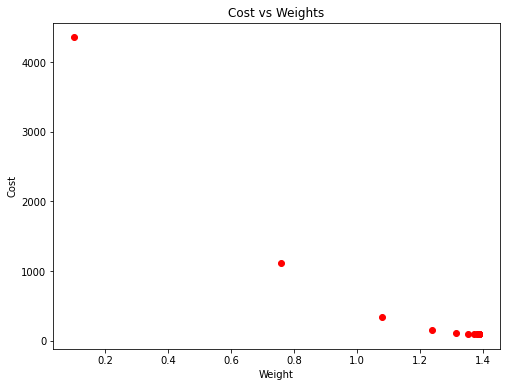

Estimated Weight: 1.389738813163012
Estimated Bias: 0.03509461674147458


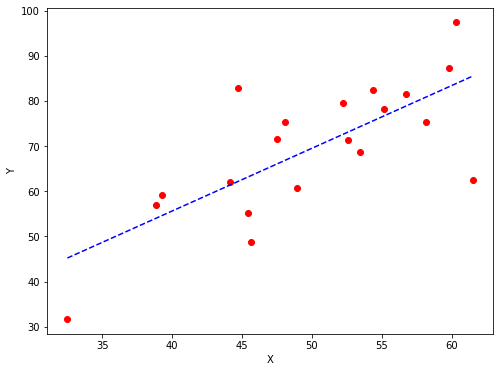

In [22]:
def main():
    #Nhập dữ liệu 
    X = np.array([32.50234527, 53.42680403, 61.53035803, 47.47563963, 59.81320787,
           55.14218841, 52.21179669, 39.29956669, 48.10504169, 52.55001444,
           45.41973014, 54.35163488, 44.1640495 , 58.16847072, 56.72720806,
           48.95588857, 44.68719623, 60.29732685, 45.61864377, 38.81681754])
    Y = np.array([31.70700585, 68.77759598, 62.5623823 , 71.54663223, 87.23092513,
           78.21151827, 79.64197305, 59.17148932, 75.3312423 , 71.30087989,
           55.16567715, 82.47884676, 62.00892325, 75.39287043, 81.43619216,
           60.72360244, 82.89250373, 97.37989686, 48.84715332, 56.87721319])
     # Ước tính weight and bias sử dụng gradient descent
    estimated_weight, eatimated_bias = gradient_descent(X, Y, iterations=2000)
    print(f"Estimated Weight: {estimated_weight}\nEstimated Bias: {eatimated_bias}")
  
    # Đưa ra dự đoán bằng cách sử dụng các thông số ước tính
    Y_pred = estimated_weight*X + eatimated_bias
  
    # Vẽ đường hồi quy
    plt.figure(figsize = (8,6))
    plt.scatter(X, Y, marker='o', color='red')
    plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='blue',markerfacecolor='red',
             markersize=10,linestyle='dashed')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()
  
      
if __name__=="__main__":
    main()

In [4]:
random.sample(range(100),20)

[50, 53, 95, 19, 0, 89, 26, 87, 66, 92, 55, 78, 42, 58, 25, 7, 45, 61, 52, 14]